## Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
main_df = pd.read_csv('train.csv')
final_df = pd.read_csv('test.csv')

In [3]:
main_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
final_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
main_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Analysis

In [7]:
age_bins = np.arange(0,90,20)
age_bins

array([ 0, 20, 40, 60, 80])

In [8]:
main_df[main_df['Survived']==1].count()[0]

342

In [9]:
df_age = pd.DataFrame()
df_age['Survived'] = main_df['Survived']
df_age['Age'] = main_df['Age']
df_age['Sex'] = main_df['Sex']
df_age['AgeGroup'] = pd.cut(main_df['Age'], bins=age_bins)

df_male = df_age[df_age['Sex']=='male']
df_male =df_male.rename(columns={'AgeGroup': 'Male Age'})

df_female = df_age[df_age['Sex']=='female']
df_female = df_female.rename(columns={'AgeGroup': 'Female Age'})

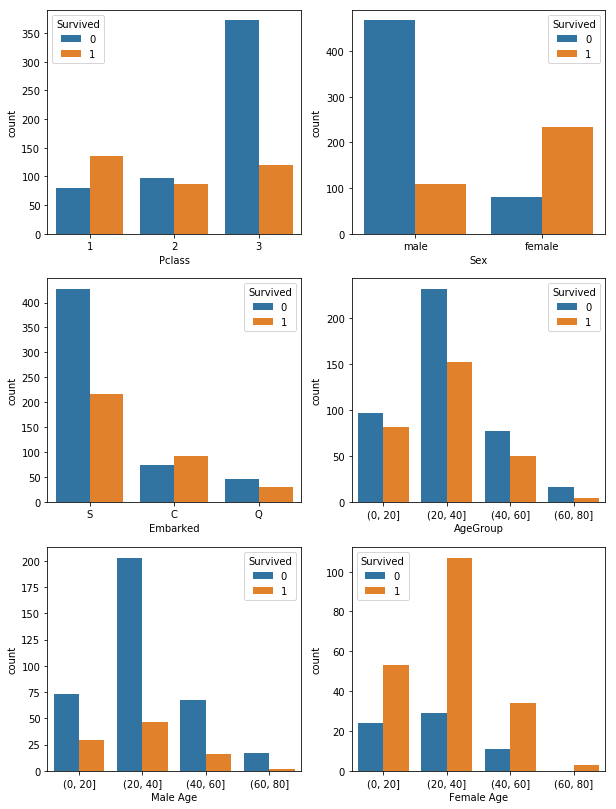

In [10]:
fig=plt.figure(figsize=[10,14])

fig.add_subplot(3,2,1)
sns.countplot(x='Pclass',hue='Survived',data=main_df)

fig.add_subplot(3,2,2)
sns.countplot(x='Sex',hue='Survived',data=main_df)

fig.add_subplot(3,2,3)
sns.countplot(x='Embarked',hue='Survived',data=main_df)

fig.add_subplot(3,2,4)
sns.countplot(x='AgeGroup',hue='Survived',data=df_age)

fig.add_subplot(3,2,5)
sns.countplot(x='Male Age',hue='Survived',data=df_male)

fig.add_subplot(3,2,6)
sns.countplot(x='Female Age',hue='Survived',data=df_female)

# Also a good idea to visualize the Age correlation:
# g = sns.FacetGrid(main_df, col='Survived')
# g.map(plt.hist, 'Age', bins=20)

plt.show()

In [11]:
int(main_df[main_df['Survived']==1].count()[0])

342

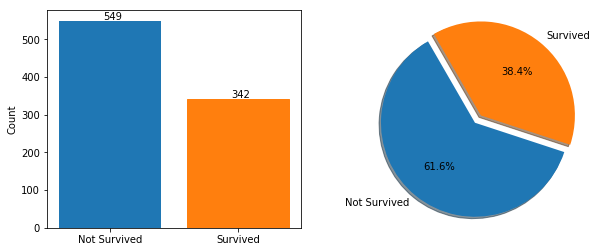

In [12]:
labels = ['Not Survived','Survived']
explode = (0, 0.1)
survivors_data = [main_df[main_df['Survived']==0].count()[0],main_df[main_df['Survived']==1].count()[0]]

fig = plt.figure(figsize=[10,4])

ax1 = fig.add_subplot(1,2,1)
barplot = plt.bar(labels,
                  survivors_data,
                  align='center')
barplot[1].set_color('C1')
plt.ylabel('Count')

for i, v in enumerate(survivors_data): #display numbers above bars
    ax1.text(i-0.05, v+2, str(v))

ax2 = fig.add_subplot(1,2,2)
ax2.pie(survivors_data,
        labels=labels,
        explode = explode,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=120)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

### Dealing with Missing and Categorical values

In [13]:
both_df = pd.concat([main_df, final_df])
both_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [14]:
both_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [15]:
names = {}
counter = 1

for item in both_df['Name']:
    if item.split(',')[1].split('.')[0].strip(' ') not in names:
        names[item.split(',')[1].split('.')[0].strip(' ')] = counter
        counter += 1
        
names   

{'Capt': 15,
 'Col': 14,
 'Don': 5,
 'Dona': 18,
 'Dr': 7,
 'Jonkheer': 17,
 'Lady': 11,
 'Major': 10,
 'Master': 4,
 'Miss': 3,
 'Mlle': 13,
 'Mme': 8,
 'Mr': 1,
 'Mrs': 2,
 'Ms': 9,
 'Rev': 6,
 'Sir': 12,
 'the Countess': 16}

In [16]:
names_repeat = dict.fromkeys(names, 0) #Create a dictionary with same keys as 'names' but with 0 values

for name in names:
    for n,item in enumerate(both_df['Name']):
        if name in item:
            names_repeat[name] += 1
    
names_repeat

{'Capt': 1,
 'Col': 15,
 'Don': 5,
 'Dona': 3,
 'Dr': 17,
 'Jonkheer': 1,
 'Lady': 1,
 'Major': 2,
 'Master': 61,
 'Miss': 260,
 'Mlle': 2,
 'Mme': 1,
 'Mr': 959,
 'Mrs': 201,
 'Ms': 2,
 'Rev': 8,
 'Sir': 3,
 'the Countess': 1}

In [17]:
rare_names = []
people = 0

for name in names_repeat.keys():
    if names_repeat[name] < 60:
        rare_names.append(name)

for key in rare_names:
    people += names_repeat[key]
    del names_repeat[key]
names_repeat['Rare'] = people

names_repeat

{'Master': 61, 'Miss': 260, 'Mr': 959, 'Mrs': 201, 'Rare': 62}

In [18]:
rare_names

['Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer',
 'Dona']

In [19]:
names_repeat.pop('Rare')
names_repeat

{'Master': 61, 'Miss': 260, 'Mr': 959, 'Mrs': 201}

In [20]:
age_by_name = {}
counter_name = 0
counter_rare = 0
counter_rest = 0
age_name = 0
age_rare = 0
age_rest = 0

for name in names_repeat:
    for n,item in enumerate(both_df['Name']):
        if pd.notna(both_df.iloc[n]['Age']):
            if item.split(',')[1].split('.')[0].strip(' ') == name: #counts the ages for titles in 'names_repeat'
                counter_name += 1
                age_name += both_df.iloc[n]['Age']
            elif item.split(',')[1].split('.')[0].strip(' ') in rare_names: #counts the ages if rare title
                counter_rare += 1
                age_rare += both_df.iloc[n]['Age']
            else: #counts the ages for the rest
                counter_rest += 1
                age_rest += both_df.iloc[n]['Age']
    age_by_name[name] = round(age_name/counter_name) # Get the average
    counter_name = 0
    age_name = 0
age_by_name['*Rare*'] = round(age_rare/counter_rare) # '*' to avoid an unintended match
    
age_by_name

{'*Rare*': 43.0, 'Master': 5.0, 'Miss': 22.0, 'Mr': 32.0, 'Mrs': 37.0}

In [21]:
final_names = {}

for n,name in enumerate(age_by_name):
    final_names[name] = n
    
final_names    

{'*Rare*': 4, 'Master': 3, 'Miss': 2, 'Mr': 0, 'Mrs': 1}

In [22]:
both_df['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [23]:
list(set(both_df['Cabin']))[:10]

[nan, 'A29', 'D26', 'B86', 'B36', 'C99', 'C110', 'E68', 'B79', 'B41']

In [24]:
deck_dict = {}
counter = 0

for item in set(both_df['Cabin']):
    if not(pd.isna(item)) and item[0] not in deck_dict:
        deck_dict[item[0]]=counter
        counter += 1

deck_dict

{'A': 0, 'B': 2, 'C': 3, 'D': 1, 'E': 4, 'F': 5, 'G': 6, 'T': 7}

In [25]:
cabin_repeat = dict.fromkeys(deck_dict, 0)

for n,item in enumerate(both_df['Cabin']):
    if pd.notna(item) and item[0] in cabin_repeat:
        cabin_repeat[item[0]] += 1
        
cabin_repeat

{'A': 22, 'B': 65, 'C': 94, 'D': 46, 'E': 41, 'F': 21, 'G': 5, 'T': 1}

In [26]:
most_common = max(cabin_repeat, key=cabin_repeat.get)
most_common

'C'

In [27]:
cabin_average = {}
counter = 0
fare = 0

for deck in deck_dict:
    for n,item in enumerate(both_df['Cabin']):
        if pd.notna(item) and item[0] == deck:
            counter += len(item.split(' ')) # Check how many cabins (if someone have more than one)
            fare += both_df.iloc[n]['Fare']    
    cabin_average[fare/counter] = deck
    counter = 0
    fare = 0
            
cabin_average

{13.559524999999999: 'F',
 14.205000000000002: 'G',
 35.5: 'T',
 41.24431363636364: 'A',
 50.798700000000004: 'D',
 53.26547619047618: 'E',
 82.86354270833334: 'B',
 88.99210701754387: 'C'}

In [28]:
# Get the nearest value from a list (using '18' only for testing)
# For every item on that list, lambda function will use 'abs(item-18)' instead of 'item', the choose the lower 'item'
cabin_average[min(list(cabin_average.keys()), key=lambda x:abs(x-18))] 

'G'

In [29]:
for port in ['Q','C','S']:
    print('Embarked on Port',port,':',both_df[both_df['Embarked']==port].shape[0])

Embarked on Port Q : 123
Embarked on Port C : 270
Embarked on Port S : 914


In [30]:
average_fare = both_df['Fare'].mean()
average_fare

33.2954792813456

In [31]:
def preprocess(df):
    
    df['Family'] = df['SibSp'] + df['Parch']
    
    for n,item in enumerate(df['Fare']): #Or use df['Fare'].fillna(df['Fare'].median(skipna=True), inplace=True)
        if pd.isna(item):
            df.at[n,'Fare'] = average_fare 
#         elif pd.notna(df.iloc[n]['Cabin']) and len(df.iloc[n]['Cabin'].split(' ')) > 1:
#             df.at[n,'Fare'] = item/len(df.iloc[n]['Cabin'].split(' ')) # Get the average fare if multiple Cabins
    
    for n,item in enumerate(df['Cabin']):
        if pd.isna(item): #if NaN, get the closest Cabin Key by the 'Fare' value
            cabin_key = cabin_average[min(list(cabin_average.keys()), key=lambda x:abs(x-df['Fare'][n]))]
            df.at[n,'Cabin'] = deck_dict[cabin_key]
#             df.at[n,'Cabin'] = deck_dict['C'] #Most common
        else:
            df.at[n,'Cabin'] = deck_dict[item[0]]

    for n,item in enumerate(df['Age']):
        if pd.isna(item):        
            if df.iloc[n]['Name'].split(',')[1].split('.')[0].strip(' ') in final_names:
                df.at[n,'Age'] = age_by_name[df.iloc[n]['Name'].split(',')[1].split('.')[0].strip(' ')]
            elif df.iloc[n]['Name'].split(',')[1].split('.')[0].strip(' ') in rare_names:
                df.at[n,'Age'] = age_by_name['*Rare*']
    
    for n,item in enumerate(df['Name']):
        if item.split(',')[1].split('.')[0].strip(' ') in final_names:
            df.at[n,'Name'] = final_names[item.split(',')[1].split('.')[0].strip(' ')]
        elif df.iloc[n]['Name'].split(',')[1].split('.')[0].strip(' ') in rare_names:
            df.at[n,'Name'] = final_names['*Rare*']
    
    for n,item in enumerate(df['Sex']):
        if item == 'female':
            df.at[n,'Sex'] = 0 # According documentation, use dt.at[row, 'collumn'] instead df['column'][row]
        elif item == 'male':
            df.at[n,'Sex'] = 1
        else:
            df.at[n,'Sex'] = 1 # Complete with most common ('male')
            
    df = pd.concat([df,pd.get_dummies(df['Embarked'])])
            
#     for n,item in enumerate(df['Embarked']):
#         if item == 'C':
#             df.at[n,'Embarked'] = 0
#         elif item == 'Q':
#             df.at[n,'Embarked'] = 1
#         elif item == 'S':
#             df.at[n,'Embarked'] = 2 
#         else: 
#             df.at[n,'Embarked'] = 2 # Complete with most common ('S'), 
#             #Or use df['Embarked'].fillna('S', inplace = True)
    
    df = df.drop(['PassengerId','Ticket','SibSp','Parch','Embarked'], axis=1)            
    df = df.fillna(0)
            
    return df

# TODO
# Convert Ages to bins
# Convert Fare to bins

In [32]:
main_df = preprocess(main_df)
main_df.head()

,Age,C,Cabin,Family,Fare,Name,Pclass,Q,S,Sex,Survived
0,22.0,0.0,5,1.0,7.2500,0,3.0,0.0,0.0,1,0.0
1,38.0,0.0,3,1.0,71.2833,1,1.0,0.0,0.0,0,1.0
2,26.0,0.0,5,0.0,7.9250,2,3.0,0.0,0.0,0,1.0
3,35.0,0.0,3,1.0,53.1000,1,1.0,0.0,0.0,0,1.0
4,35.0,0.0,5,0.0,8.0500,0,3.0,0.0,0.0,1,0.0


In [33]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1782 entries, 0 to 890
Data columns (total 11 columns):
Age         1782 non-null float64
C           1782 non-null float64
Cabin       1782 non-null int64
Family      1782 non-null float64
Fare        1782 non-null float64
Name        1782 non-null int64
Pclass      1782 non-null float64
Q           1782 non-null float64
S           1782 non-null float64
Sex         1782 non-null int64
Survived    1782 non-null float64
dtypes: float64(8), int64(3)
memory usage: 167.1 KB


## Separating Features (X) from Classes (y)

In [34]:
X = main_df.drop(['Survived'], axis=1)
y = main_df['Survived']

X.head()

,Age,C,Cabin,Family,Fare,Name,Pclass,Q,S,Sex
0,22.0,0.0,5,1.0,7.2500,0,3.0,0.0,0.0,1
1,38.0,0.0,3,1.0,71.2833,1,1.0,0.0,0.0,0
2,26.0,0.0,5,0.0,7.9250,2,3.0,0.0,0.0,0
3,35.0,0.0,3,1.0,53.1000,1,1.0,0.0,0.0,0
4,35.0,0.0,5,0.0,8.0500,0,3.0,0.0,0.0,1


In [35]:
y[:5]

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

## Balancing Data (Over-sampling)

In [36]:
len(X)

1782

In [37]:
y.mean()

0.1919191919191919

In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_train, y_train = sm.fit_resample(X, y)

In [39]:
y_train.mean()

0.5

In [40]:
len(X_train)

2880

## Scaling Data

In [41]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train[:5]

array([[0.275     , 0.        , 0.71428571, 0.1       , 0.01415106,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [0.475     , 0.        , 0.42857143, 0.1       , 0.13913574,
        0.25      , 0.33333333, 0.        , 0.        , 0.        ],
       [0.325     , 0.        , 0.71428571, 0.        , 0.01546857,
        0.5       , 1.        , 0.        , 0.        , 0.        ],
       [0.4375    , 0.        , 0.42857143, 0.1       , 0.1036443 ,
        0.25      , 0.33333333, 0.        , 0.        , 0.        ],
       [0.4375    , 0.        , 0.71428571, 0.        , 0.01571255,
        0.        , 1.        , 0.        , 0.        , 1.        ]])

## Building Decision Tree

In [42]:
dt = DecisionTreeClassifier(random_state=101)

In [43]:
dt = dt.fit(X_train,y_train)

In [44]:
print('DT Score:', dt.score(scaled_X_train, y_train))
print('CV score:', cross_val_score(dt, scaled_X_train, y_train, cv = 3).mean())

DT Score: 0.8871527777777778
CV score: 0.9027777777777778


## Building Random Forest

In [45]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=101)
rf.fit(scaled_X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=101, verbose=0, warm_start=False)

In [46]:
print('RF Score:', rf.score(scaled_X_train, y_train))
print('oob score:', rf.oob_score_)
print('CV score:', cross_val_score(rf, scaled_X_train, y_train, cv = 3).mean())

RF Score: 0.9954861111111111
oob score: 0.94375
CV score: 0.9024305555555555


## Building SVM

In [47]:
svm = SVC(gamma='auto',random_state=101)
svm.fit(scaled_X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
print('SVM Score:', svm.score(scaled_X_train, y_train))
print('CV score:', cross_val_score(svm, scaled_X_train, y_train, cv = 3).mean())

SVM Score: 0.8850694444444445
CV score: 0.7663194444444444


## Hyperparameters tuning (Best: Random Forest)

In [49]:
print(rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 101, 'verbose': 0, 'warm_start': False}


In [50]:
rf_grid = RandomForestClassifier(oob_score=True, random_state=101) # creates a new estimator

# Create the parameter grid based on the results of random search 
param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 5, 10, 15],
              'n_estimators': [100, 200, 300, 500]}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

In [51]:
# Fit the grid search to the data and show the best parameters
grid_search.fit(scaled_X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.0min finished


{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [52]:
best_grid = grid_search.best_estimator_
best_grid # Note that it's a classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=101, verbose=0, warm_start=False)

In [53]:
print('RF Score:', best_grid.score(scaled_X_train, y_train))
print('oob score:', best_grid.oob_score_)
print('CV score:', cross_val_score(best_grid, scaled_X_train, y_train, cv = 3).mean())

RF Score: 0.9930555555555556
oob score: 0.9451388888888889
CV score: 0.9052083333333334


In [54]:
# Try KNN and Logistic Regression

## Checking importances

In [55]:
best_grid.feature_importances_

array([1.79617640e-01, 8.67446009e-04, 8.94527071e-02, 4.93605273e-02,
       2.17869810e-01, 2.77653683e-01, 1.16061569e-01, 1.90577004e-05,
       6.89738644e-03, 6.22001732e-02])

In [56]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(best_grid.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Name,0.278
Fare,0.218
Age,0.180
Pclass,0.116
Cabin,0.089
Sex,0.062
Family,0.049
S,0.007
C,0.001


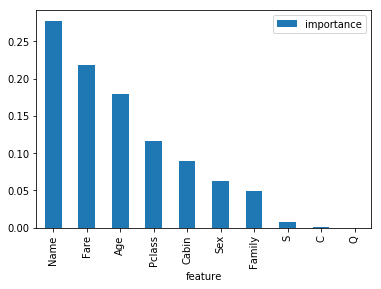

In [57]:
importances.plot.bar()
plt.show()

## Final Prediction

In [58]:
submission_df = preprocess(final_df)

In [59]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 417
Data columns (total 10 columns):
Age       836 non-null float64
C         836 non-null float64
Cabin     836 non-null int64
Family    836 non-null float64
Fare      836 non-null float64
Name      836 non-null int64
Pclass    836 non-null float64
Q         836 non-null float64
S         836 non-null float64
Sex       836 non-null int64
dtypes: float64(7), int64(3)
memory usage: 71.8 KB


In [60]:
scaled_X_final = scaler.transform(submission_df)
scaled_X_final

array([[0.43125   , 0.        , 0.71428571, ..., 0.        , 0.        ,
        1.        ],
       [0.5875    , 0.        , 0.71428571, ..., 0.        , 0.        ,
        0.        ],
       [0.775     , 0.        , 0.71428571, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [61]:
final_prediction = best_grid.predict(scaled_X_final)
final_prediction

array([0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [62]:
final = pd.concat([final_df['PassengerId'],pd.DataFrame(final_prediction, columns=['Survived'])], axis=1)
final.head()

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,0.0
3,895.0,1.0
4,896.0,1.0


## Writing on CSV file

In [63]:
with open('submission.csv','w') as csv_file:
    csv_file.write('PassengerId,Survived\n')
    
    for _,row in final.iterrows():
        text = str(row['PassengerId'])+','+str(row['Survived'])
        csv_file.write(text+'\n')